# ANHA4 sea-ice variability and its relation with d18O

This notebook summerized the calculation of ANHA4 sea-ice variability and the correspond change of d18O.

# Import modules & tools

In [117]:
import sys
sys.path.insert(0, '../../_libs/')

In [118]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [119]:
def monmean_3d(data):
    monmean=np.zeros([12, np.size(data, axis=1), np.size(data, axis=2)])
    for mon in range(12):
        monmean[mon, :, :] = np.nanmean(data[mon:len(data):12, :, :], 0)
    return monmean

In [120]:
ANHA4_MAT=scipy.io.loadmat('../../_data/Exchange/coord_ANHA4.mat')
nav_lat = ANHA4_MAT['nav_lat']
nav_lon = ANHA4_MAT['nav_lon']

In [212]:
ice_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/ileadfra_monmean.nc'
ice_obj = nc.Dataset(ice_name)
ice = ice_obj.variables['ileadfra'][:]


sss_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'
sss_obj = nc.Dataset(sss_name)
sss = sss_obj.variables['isssalin'][:]

In [200]:
ice_monmean = monmean_3d(ice)

In [201]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

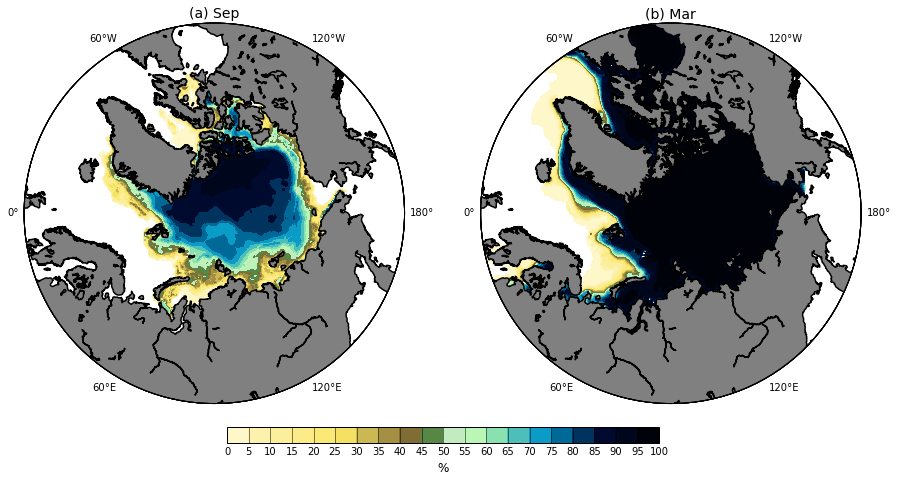

In [202]:
lev = np.arange(0, 105, 5)
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, ice_monmean[8, :, :]*100, lev, cmap=cm.GMT_relief_r)
ax1.set_title('(a) Sep', fontsize=14)

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, ice_monmean[2, :, :]*100, lev, cmap=cm.GMT_relief_r)
ax2.set_title('(b) Mar', fontsize=14)

cax  = fig.add_axes([0.313, 0.3, 0.4, 0.015])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('%', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev)

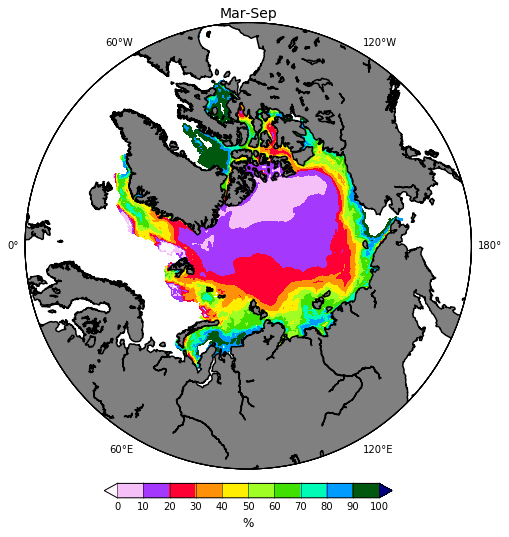

In [203]:
lev2 = np.arange(0, 110, 10)
fig=plt.figure(figsize=(8, 8));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, (ice_monmean[2, :, :]-ice_monmean[8, :, :])*100, lev2, cmap=plt.cm.gist_ncar_r, extend='both')
ax.set_title('Mar-Sep', fontsize=14)

cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('%', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev2)

In [204]:
ice_var = (ice_monmean[2, :, :]-ice_monmean[8, :, :])*100
#ice_var = ice_var.T

# d18O's variability at 90^+% sea-ice melt region in Baffin Bay 

In [130]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(25)]

**Calculate emp as a reference**

In [105]:
safl_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/iocesafl_monmean.nc'
sss_name  = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'
safl_obj = nc.Dataset(safl_name)
safl = safl_obj.variables['iocesafl'][:]
sss_obj = nc.Dataset(sss_name)
sss = sss_obj.variables['isssalin'][:]
emps=-1.0*safl*34.7/(3600.0*24*(sss+1.0e-16))

In [144]:
lnum=0
FName = '/ocean/yingkai/GEOTRACES/Simulations/EXP001_1m_20020101_20050101_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
nav_lon = ptrc_obj.variables['nav_lon'][:]
nav_lat = ptrc_obj.variables['nav_lat'][:]
d18O = np.squeeze(ptrc_obj.variables['d18O'][:, lnum, :, :]); d18O[d18O==0]=np.nan

In [129]:
d18O.shape

(25, 800, 544)

In [28]:
rf_name=glob.glob('../../_data/Samples/STN-30p/runoff_id_modified.mat')
rf_obj=scipy.io.loadmat(rf_name[0])
rf_id=rf_obj['rf_id']
rf_lon=rf_obj['lon']
rf_lat=rf_obj['lat']
rf_id[rf_id==2]=0 # 0 is Central Arctic

In [30]:
Class_interp = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='nearest')
Class_range = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan

In [196]:
ice.shape

(144, 544, 800)

In [214]:
id1 = (ice_var>90)
id2 = (Class_interp==3)
id12 = np.logical_and(id1, id2)
y = np.nanmean(d18O[:-1, id12], 1)
#y = np.nanmean(np.nanmean(d18O[:-1, :], 1), 1)
emps_baffin = np.nanmean(emps[:24, id12], 1)
#emps_baffin = np.nanmean(np.nanmean(emps[:24, :], 1), 1)
ice_baffin = np.nanmean(ice[:24, id12], 1)
sss_baffin = np.nanmean(sss[:24, id12], 1)

/home/yingkai/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [215]:
y_stack = np.reshape(y, [2, 12])
#y_stack_min = np.min(y_stack, 0)
#y_stack_mean = np.mean(y_stack, 0)
#y_stack_max = np.max(y_stack, 0)

emps_stack = np.reshape(emps_baffin, [2, 12])
#emps_stack_min = np.min(emps_stack, 0)
#emps_stack_mean = np.mean(emps_stack, 0)
#emps_stack_max = np.max(emps_stack, 0)

ice_stack = np.reshape(ice_baffin, [2, 12])
sss_stack = np.reshape(sss_baffin, [2, 12])
fake_x = range(1, 13)

**d18O seasonal cycle**

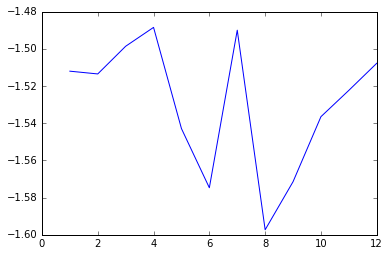

In [207]:
plt.plot(fake_x, y_stack[1, :].T);

**Correspond emps**

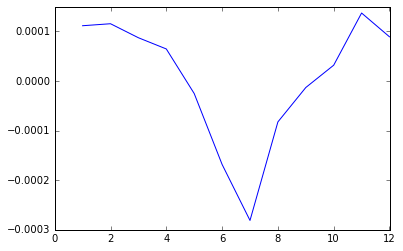

In [208]:
plt.plot(fake_x, emps_stack[1, :].T);

**Correspond sea-ice cover**

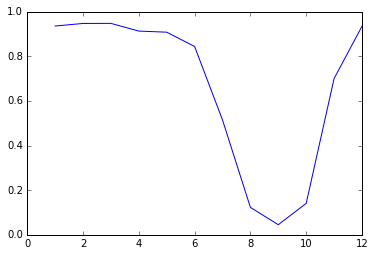

In [209]:
plt.plot(fake_x, ice_stack[1, :].T);

**Correspond salinity**

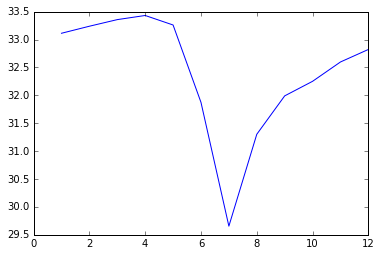

In [216]:
plt.plot(fake_x, sss_stack[1, :].T);

### Problems
* d18O's seasonal variability looks bad.
* *sea-ice concentration* disagree with *emps* even in the region which has 100% net sea-ice melt. (We are using (-emps)-precip-runoff as net sea-ice melt).

### Potential reasons
* 2002-2004 without spin-up is not a good representation of d18O climatology.
* We are adding d18O as "d18O unit per second" which is right, but does d18O have dilution ? 
* *Sea-ice concentration* may not consistant with *sea-ice thickness/velosity*.


### Things to do
* Separating d18O from Ba in case to test d18O. (Ba part has spined-up and now on base run).
* Test d18O without dilution to see the difference.
* Higher sea-ice melt water end-member value (now 2.5 comparing with 0.8 in the past).
* Longer experiments.


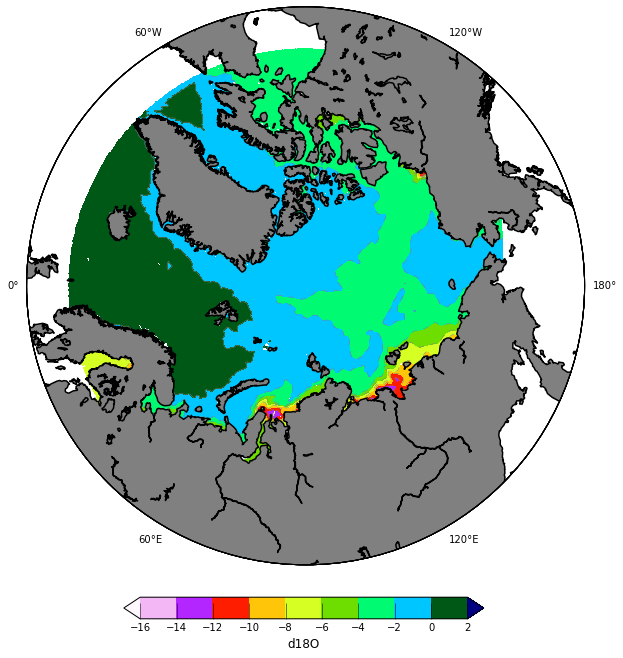

In [223]:
lev2 = np.arange(-16, 4, 2)
for i in range(12, 13):
    fig=plt.figure(figsize=(10, 10));
    ax = fig.gca()

    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, d18O[i, :, :], lev2, cmap=plt.cm.gist_ncar_r, extend='both')
    proj.contour(x, y, d18O[i, :, :], lev2, linewidths=0.5, colors=('gray',))
    
    
    cax = fig.add_axes([0.26, 0.05, 0.5, 0.03])
    CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
    CBar.set_label('d18O', fontsize=12)
    CBar.ax.tick_params(axis='x', length=16)
    CBar.set_ticks(lev2)